## Length distributions of the scaffolds
Now that we have the assembly, we will do some quick analyses to get an idea of the quality. 
This is a **python notebook again**. 
First, we will plot the length distribution of the scaffolds in the assembly. 
Luckily for us, the length of each sequence in the fasta is already embedded in each fasta header. 
We can easily extract these numbers and plot them in python.
Second, we'll plot the length versus the depth (or vertical coverage) of the scaffolds.

Since this is a bash practical, I wrote the python code for you already. All you need to do is add the path to your assembly file in the line 

> f = open("path/to/assembly.file","r")

**[DO:] Plot the scaffold length distribution by running the python code below.**

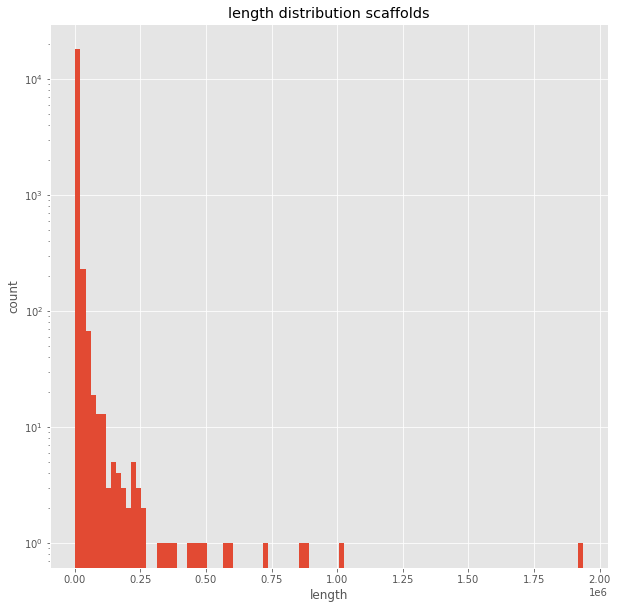

In [1]:
import matplotlib.pyplot as plt
import re
%matplotlib inline  
plt.style.use('ggplot')

f = open("data/assembly/scaffolds.fasta", "r")

lines = f.readlines()
f.close()

lengths = []
regexp = re.compile(">")

for line in lines:
    if re.search(regexp, line):
        line = line.strip().split('_')
        lengths.append(float(line[3]))
        
fig = plt.figure(figsize=(10,10))
plt.hist(lengths, bins=100, log=True);
plt.title("length distribution scaffolds");
plt.xlabel("length");
plt.ylabel("count");

**[Q:] Did you expect this distribution?**



**[A:]** Yes this distribution is to be expected.
The assembly contains few long scaffolds/contigs and many short ones.

**[Q:] Why would there be so many short scaffolds?**

**[A:]** Due to ambiguities an assembler cannot solve, possible long contigs are broken into pieces to prevent forming chimeric contigs.
In a (de bruijn) graph assembly, ambiguities may exist which results in unsolvable structures in the graph.
These are for example:
* highly conserved genes that are shared by multiple organisms (such as the 16s rRNA gene).
* repetitive regions within one particular genome (which is the case for *N. azollae* the main symbiont [Reference](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0011486))
* two similar organisms with similar genomes

**[DO:]Now make the following plot.** (No coding needed)

<function matplotlib.pyplot.show(close=None, block=None)>

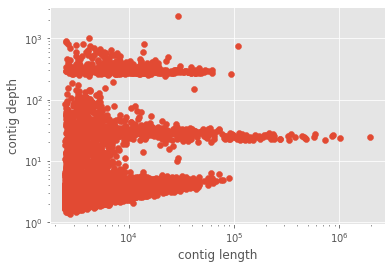

In [2]:
coverage = []
for line in lines:
    if re.search(regexp, line):
        line = line.strip().split('_')
        coverage.append(float(line[5]))

plt.scatter(lengths,coverage)
plt.xlabel('contig length')
plt.ylabel('contig depth')
plt.xscale('log')
plt.yscale('log')
plt.show

**[Q:] what do the axis mean?**

**[A:]**
* Contig length is the length of a particular contig.
* Contig depth represents the abundance of a particular contig.

**[DO:] Identify three horizontal clusters in the plot above**

**[Q:] what do you think the horizontal clusters of dots represent in this figure?**
 

**[A:]** Horizontal clusters of dots represent many contigs of equal abundance but of different length.
One such a cluster could be one bacterial genome, assuming that all parts of any bacteria's genome are always equeally abundant.

**Advanced extra info**

The top cluster is slightly triangular, this is the most abundant genome by far and most likely the main symbiont's genome. 
This particular genome is known to contain many repetitive regions (transposons etc.). 
These likely cause the traingular shape.

The bottom cluster is also slightly triangular. 
This triangular shape represents the lower limit of assembly.
The lesser abundant a certain piece of DNA is in the original sample, the harder it will be to assemble a long piece of DNA out of these sparse puzzle pieces.
That is what the diagonal line represents.


### example

For my PhD project on the Azolla metagenome, I made a "metagenome taxnomy browser" based on the simple principle you just used.
In addition to plotting contig depth vs contig length, I added taxonomy information and some filtering options. 
The final interactive graph is available [online to play with](https://utrecht-university.shinyapps.io/Azolla_genus-wide_metagenome_taxonomy/).

**[DO:] Find the Azolla wild sample in the interactive plot**
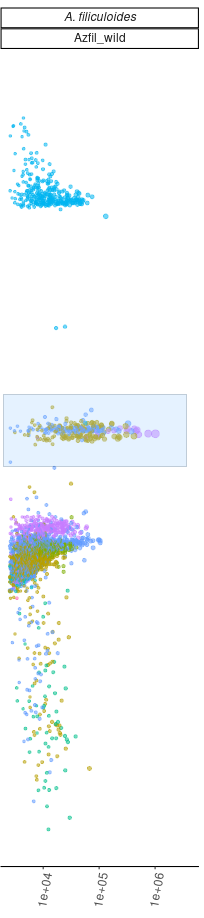

Summary of the selected square in the snapshot above:
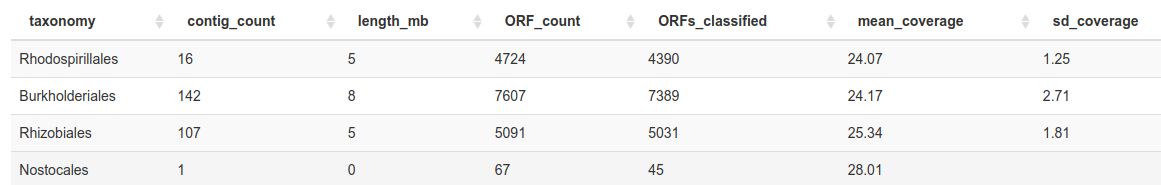

**[Q:] How many species are present in each of these horizontal clusters you identified in your own python figure?**
 

**[A:]** The top cluster contains only Nostocales, the order of bacteria containing _Nostoc azollae_, _Azolla_'s main symbiont.

The middle cluster actually contains three bacteria in stead of one, all with about equal abundance. 
They are from the Bacterial orders 'rhodospirillales, Burkholderiales and Rhizobiales.

The bottom cluster also contains multiple bacteria. It seems at least 4 to 5 different orders are present here.